<a href="https://colab.research.google.com/github/swaty369/Incident-Management-System/blob/final_files/Incident_model_linear_model_assumptions_final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
data=pd.read_csv("/content/drive/My Drive/GL Capstone/df11_encoded_and_numerical_without_scale.csv")
#data = pd.read_csv('https://drive.google.com/file/d/1caHdL5aeSMoaLyNJaXgy4uCQNTYODIu7/view?usp=sharing')
data.head()

,reassignment_count,reopen_count,sys_mod_count,predicted_closed_days,days_took_to_sys_created,days_took_to_sys_updated,days_took_to_resolve,days_took_to_close,opened_month,opened_day,opened_hour,opened_minute,sys_updated_month,sys_updated_day,sys_updated_hour,sys_updated_minute,closed_month,closed_day,closed_hour,closed_minute,sys_created_month,sys_created_day,sys_created_hour,sys_created_minute,resolved_month,resolved_day,resolved_hour,resolved_minute,number,incident_state,active,made_sla,opened_by,sys_created_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,resolved_by
0,0.0,0,0.000000,5.447222,0.004861,0.000000,0.420833,5.021528,2,29,1,16,2,29,1,23,3,5,12,0,2,29,1,23,2,29,11,29,0,6,0,1,199,151,95,2,42,45,68,499,1,1,2,47,72,1,0,0,51
1,0.0,0,0.000000,6.222222,0.011806,0.000000,1.204861,5.005556,2,29,4,40,2,29,4,57,3,6,10,0,2,29,4,57,3,1,9,52,1,6,0,1,120,58,548,2,61,29,111,351,1,1,2,63,220,1,0,0,196
2,1.0,0,1.000000,6.222222,0.011806,0.022917,1.181944,5.005556,2,29,4,40,2,29,5,30,3,6,10,0,2,29,4,57,3,1,9,52,1,1,0,1,120,58,95,2,61,29,111,351,1,1,2,15,164,1,0,0,196
3,1.0,0,1.414214,6.222222,0.011806,0.025000,1.179861,5.005556,2,29,4,40,2,29,5,33,3,6,10,0,2,29,4,57,3,1,9,52,1,1,0,1,120,58,95,2,61,29,111,351,1,1,2,15,164,1,0,0,196
4,1.0,0,1.732051,6.222222,0.011806,0.273611,0.931250,5.005556,2,29,4,40,2,29,11,31,3,6,10,0,2,29,4,57,3,1,9,52,1,1,0,1,120,58,596,2,61,29,111,351,1,1,2,15,164,1,0,0,196


In [8]:
X=data.drop(["predicted_closed_days"],axis=1)
y=data["predicted_closed_days"]

In [11]:
# scaling numerical data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [12]:
X_scaled.head()

,reassignment_count,reopen_count,sys_mod_count,days_took_to_sys_created,days_took_to_sys_updated,days_took_to_resolve,days_took_to_close,opened_month,opened_day,opened_hour,opened_minute,sys_updated_month,sys_updated_day,sys_updated_hour,sys_updated_minute,closed_month,closed_day,closed_hour,closed_minute,sys_created_month,sys_created_day,sys_created_hour,sys_created_minute,resolved_month,resolved_day,resolved_hour,resolved_minute,number,incident_state,active,made_sla,opened_by,sys_created_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,resolved_by
0,-0.936872,-0.112487,-1.182618,-0.089414,-0.294264,-0.360153,-0.205327,-1.862223,1.610383,-2.753916,-0.780255,-1.801391,1.583232,-2.829168,-0.390680,-1.017642,-1.287313,-0.468703,-0.983918,-1.859142,1.634701,-2.775250,-0.392518,-1.663989,1.526465,-0.414323,-0.037873,-1.529484,1.083193,0.0,0.023686,1.777451,1.251550,-1.207674,-0.064681,-0.862678,1.098438,-0.599141,1.517636,0.005372,0.028698,0.089545,0.147366,-0.547887,2.007743,-0.148558,-0.022738,-0.655482
1,-0.936872,-0.112487,-1.182618,-0.084235,-0.294264,-0.325599,-0.208631,-1.862223,1.610383,-1.995350,0.610654,-1.801391,1.583232,-2.082425,1.573180,-1.017642,-1.174645,-1.001012,-0.983918,-1.859142,1.634701,-2.016262,1.565202,-0.905780,-1.652715,-0.982169,1.299198,-1.529336,1.083193,0.0,0.023686,0.555439,-0.232126,0.709954,-0.064681,-0.565844,-0.039909,0.074229,0.222351,0.005372,0.028698,0.089545,0.865267,2.117173,2.007743,-0.148558,-0.022738,1.731838
2,0.320041,-0.112487,-0.447352,-0.084235,-0.292741,-0.326609,-0.208631,-1.862223,1.610383,-1.995350,0.610654,-1.801391,1.583232,-1.833510,0.013644,-1.017642,-1.174645,-1.001012,-0.983918,-1.859142,1.634701,-2.016262,1.565202,-0.905780,-1.652715,-0.982169,1.299198,-1.529336,-1.105096,0.0,0.023686,0.555439,-0.232126,-1.207674,-0.064681,-0.565844,-0.039909,0.074229,0.222351,0.005372,0.028698,0.089545,-1.288435,1.108772,2.007743,-0.148558,-0.022738,1.731838
3,0.320041,-0.112487,-0.142795,-0.084235,-0.292603,-0.326701,-0.208631,-1.862223,1.610383,-1.995350,0.610654,-1.801391,1.583232,-1.833510,0.186926,-1.017642,-1.174645,-1.001012,-0.983918,-1.859142,1.634701,-2.016262,1.565202,-0.905780,-1.652715,-0.982169,1.299198,-1.529336,-1.105096,0.0,0.023686,0.555439,-0.232126,-1.207674,-0.064681,-0.565844,-0.039909,0.074229,0.222351,0.005372,0.028698,0.089545,-1.288435,1.108772,2.007743,-0.148558,-0.022738,1.731838
4,0.320041,-0.112487,0.090900,-0.084235,-0.276088,-0.337658,-0.208631,-1.862223,1.610383,-1.995350,0.610654,-1.801391,1.583232,-0.340023,0.071404,-1.017642,-1.174645,-1.001012,-0.983918,-1.859142,1.634701,-2.016262,1.565202,-0.905780,-1.652715,-0.982169,1.299198,-1.529336,-1.105096,0.0,0.023686,0.555439,-0.232126,0.913146,-0.064681,-0.565844,-0.039909,0.074229,0.222351,0.005372,0.028698,0.089545,-1.288435,1.108772,2.007743,-0.148558,-0.022738,1.731838


In [13]:
X_scaled.columns

Index(['reassignment_count', 'reopen_count', 'sys_mod_count',
       'days_took_to_sys_created', 'days_took_to_sys_updated',
       'days_took_to_resolve', 'days_took_to_close', 'opened_month',
       'opened_day', 'opened_hour', 'opened_minute', 'sys_updated_month',
       'sys_updated_day', 'sys_updated_hour', 'sys_updated_minute',
       'closed_month', 'closed_day', 'closed_hour', 'closed_minute',
       'sys_created_month', 'sys_created_day', 'sys_created_hour',
       'sys_created_minute', 'resolved_month', 'resolved_day', 'resolved_hour',
       'resolved_minute', 'number', 'incident_state', 'active', 'made_sla',
       'opened_by', 'sys_created_by', 'sys_updated_by', 'contact_type',
       'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency',
       'priority', 'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'resolved_by'],
      dtype='object')

In [14]:
X_scaled.shape

(90956, 48)

In [15]:
X_final=X_scaled.drop(['days_took_to_sys_created','days_took_to_sys_updated','days_took_to_resolve','days_took_to_close','closed_month', 'closed_day',
       'closed_hour', 'closed_minute', 'resolved_month',
       'resolved_day', 'resolved_hour', 'resolved_minute','sys_updated_month', 'sys_updated_day',
       'sys_updated_hour', 'sys_updated_minute', 'made_sla','notify','resolved_by','sys_updated_by','active','number','impact','urgency','contact_type'],axis=1)


In [31]:
X_final.columns

Index(['reassignment_count', 'reopen_count', 'sys_mod_count', 'opened_month',
       'opened_day', 'opened_hour', 'opened_minute', 'sys_created_month',
       'sys_created_day', 'sys_created_hour', 'sys_created_minute',
       'incident_state', 'opened_by', 'sys_created_by', 'location', 'category',
       'subcategory', 'u_symptom', 'priority', 'assignment_group',
       'assigned_to', 'knowledge', 'u_priority_confirmation'],
      dtype='object')

In [24]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

X_constant=sm.add_constant(X_final)

ols = sm.OLS(y, X_constant)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.222
Model:                               OLS   Adj. R-squared:                  0.222
Method:                    Least Squares   F-statistic:                     1127.
Date:                   Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                           21:09:35   Log-Likelihood:            -4.2478e+05
No. Observations:                  90956   AIC:                         8.496e+05
Df Residuals:                      90932   BIC:                         8.498e+05
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      19.1612      0.086    223.763      0.000      18.993      19.329
reassignment_count         -8.6255      0.123    -70.091      0.000      -8.867      -8.384
reopen_count               -1.8429      0.113    -16.286      0.000      -2.065      -1.621
sys_mod_count              18.5576      0.128    144.586      0.000      18.306      18.809
opened_month              -11.6840      1.984     -5.890      0.000     -15.572      -7.796
opened_day                 -4.1560      0.746     -5.572      0.000      -5.618      -2.694
opened_hour                 0.1767      0.382      0.463      0.644      -0.572       0.925
opened_minute              -0.5454      0.107     -5.115      0.000      -0.754      -0.336
sys_created_month          11.5465      1.991      5.799      0.000       7.644      15.449
sys_created_day             3.7043      0.743      4.984      0.000       2.247       5.161
sys_created_hour            0.3381      0.382      0.886      0.376      -0.410       1.086
sys_created_minute          0.5226      0.107      4.880      0.000       0.313       0.732
incident_state              3.0127      0.090     33.409      0.000       2.836       3.189
opened_by                   0.0404      0.090      0.452      0.651      -0.135       0.216
sys_created_by             -0.3877      0.090     -4.318      0.000      -0.564      -0.212
location                    0.1299      0.086      1.505      0.132      -0.039       0.299
category                   -0.3670      0.087     -4.234      0.000      -0.537      -0.197
subcategory                -0.6131      0.087     -7.049      0.000      -0.784      -0.443
u_symptom                   0.1969      0.086      2.283      0.022       0.028       0.366
priority                    1.7803      0.089     20.093      0.000       1.607       1.954
assignment_group            0.8113      0.089      9.128      0.000       0.637       0.986
assigned_to                 1.7923      0.089     20.237      0.000       1.619       1.966
knowledge                   2.1009      0.112     18.716      0.000       1.881       2.321
u_priority_confirmation     0.3066      0.114      2.678      0.007       0.082       0.531
==============================================================================
Omnibus:                    88040.544   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4377887.707
Skew:                           4.784   Prob(JB):                         0.00
Kurtosis:                      35.613   Cond. No.                         56.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

## Assumption 1: Multicolinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['columns']=X_final.columns.tolist()
vif['vif']=[variance_inflation_factor(X_final.values,i) for i in range(X_final.shape[1])]
vif.sort_values(by='vif',ascending=False).T
# pd.DataFrame({"vif":vif[1:]},index=X.columns).sort_values(ascending=False)


,7,3,4,8,5,9,2,0,22,1,21,10,6,11,13,12,19,18,20,16,15,14,17
columns,sys_created_month,opened_month,opened_day,sys_created_day,opened_hour,sys_created_hour,sys_mod_count,reassignment_count,u_priority_confirmation,reopen_count,knowledge,sys_created_minute,opened_minute,incident_state,sys_created_by,opened_by,assignment_group,priority,assigned_to,subcategory,category,location,u_symptom
vif,540.692,536.625,75.8714,75.3432,19.88,19.862,2.24658,2.06528,1.78717,1.74611,1.71841,1.56353,1.55055,1.10899,1.09924,1.09261,1.0775,1.07057,1.06969,1.0314,1.02457,1.0155,1.01407


In [37]:
# dropping features that cause high vif one by one
inp1 = X_final.drop(['sys_created_month', 'sys_created_hour','sys_created_day'], axis=1)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['columns']=inp1.columns.tolist()
vif['vif']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]

vif.sort_values(by='vif',ascending=False).T

,2,0,19,1,18,6,7,3,4,8,10,9,16,15,17,13,12,11,14,5
columns,sys_mod_count,reassignment_count,u_priority_confirmation,reopen_count,knowledge,opened_minute,sys_created_minute,opened_month,opened_day,incident_state,sys_created_by,opened_by,assignment_group,priority,assigned_to,subcategory,category,location,u_symptom,opened_hour
vif,2.24344,2.06261,1.78611,1.74557,1.71107,1.47642,1.47262,1.35158,1.31428,1.10297,1.09849,1.09239,1.0761,1.07042,1.06785,1.03096,1.02319,1.01521,1.01393,1.01378


**Inference:** We can see now that highest vif has come down to 2.24 which is not bad lets recheck our ols model with the new features

In [39]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

X_constant=sm.add_constant(inp1)

ols = sm.OLS(y, X_constant)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.222
Model:                               OLS   Adj. R-squared:                  0.221
Method:                    Least Squares   F-statistic:                     1294.
Date:                   Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                           21:18:22   Log-Likelihood:            -4.2480e+05
No. Observations:                  90956   AIC:                         8.496e+05
Df Residuals:                      90935   BIC:                         8.498e+05
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      19.1612      0.086    223.725      0.000      18.993      19.329
reassignment_count         -8.6085      0.123    -69.986      0.000      -8.850      -8.367
reopen_count               -1.8479      0.113    -16.331      0.000      -2.070      -1.626
sys_mod_count              18.5843      0.128    144.871      0.000      18.333      18.836
opened_month               -0.1957      0.100     -1.966      0.049      -0.391      -0.001
opened_day                 -0.4354      0.098     -4.434      0.000      -0.628      -0.243
opened_hour                 0.5092      0.086      5.905      0.000       0.340       0.678
opened_minute              -0.5180      0.104     -4.978      0.000      -0.722      -0.314
sys_created_minute          0.4970      0.104      4.782      0.000       0.293       0.701
incident_state              3.0472      0.090     33.877      0.000       2.871       3.223
opened_by                   0.0381      0.090      0.426      0.670      -0.137       0.214
sys_created_by             -0.3841      0.090     -4.279      0.000      -0.560      -0.208
location                    0.1238      0.086      1.435      0.151      -0.045       0.293
category                   -0.3715      0.087     -4.289      0.000      -0.541      -0.202
subcategory                -0.6079      0.087     -6.990      0.000      -0.778      -0.437
u_symptom                   0.1947      0.086      2.258      0.024       0.026       0.364
priority                    1.7848      0.089     20.142      0.000       1.611       1.958
assignment_group            0.8169      0.089      9.195      0.000       0.643       0.991
assigned_to                 1.7767      0.089     20.075      0.000       1.603       1.950
knowledge                   2.0969      0.112     18.717      0.000       1.877       2.316
u_priority_confirmation     0.3083      0.114      2.693      0.007       0.084       0.533
==============================================================================
Omnibus:                    87969.383   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4364059.487
Skew:                           4.779   Prob(JB):                         0.00
Kurtosis:                      35.560   Cond. No.                         2.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Inference:** We can see now that Condition number is now come down to only2.86 which is pretty nice

## Assumption 2: Normality test

In [41]:
# statistical test 
# jarque bera where test value should be less
# H0 : Normally distributed
# H1: Not normally distributed

from scipy import stats
t, pval = stats.jarque_bera(ols_mod.resid)

if pval>=0.05:
    print(f"jarque-ber test pvalue : {pval}")
    print("Residues are normally distributed")
else:
    print(f"jarque-ber test pvalue : {pval}")
    print("Residues are not normally distributed")

jarque-ber test pvalue : 0.0
Residues are not normally distributed


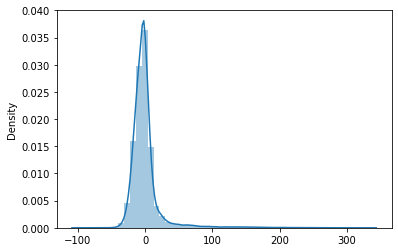

In [42]:
# checking visually
sns.distplot(ols_mod.resid)

**Inference:**
    We can see residues are not normally distributed indicating few very high or very low values probably causing skewness. We can see that target has lots of values which are either too high or too low which also makes sense as some cases are taking longer than usual to be resolec

## Assumption3: Linearity of Residuals:

In [43]:
ypred = ols_mod.predict(X_constant)



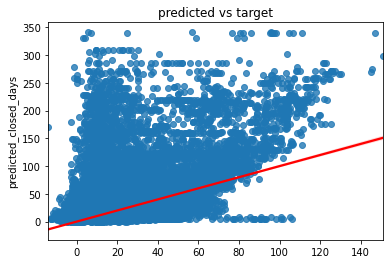

In [46]:
#plot observed should be linear
plt.title("predicted vs target")
sns.regplot(ypred, y, line_kws= {'color':'red'})
# sns.scatterplot(ypred, y)

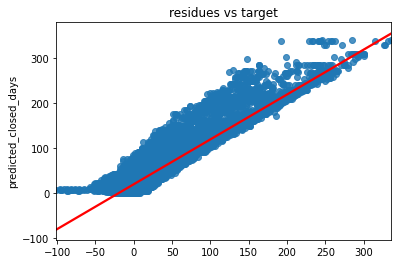

In [47]:
# plot observed should be random
plt.title("residues vs target")
sns.regplot(ols_mod.resid, y, line_kws= {'color':'red'})

In [49]:
# statistical test
import statsmodels.api as sm

# h0: section of data is linear
# H1: section of data is not linear

t, pval = sm.stats.diagnostic.linear_rainbow(res=ols_mod, frac=0.5)

if pval>=0.05:
    print(f"linear_rainbow test pvalue : {pval}")
    print("Null accepted: section of data is linear")
else:
    print(f"linear_rainbow test pvalue : {pval}")
    print("Section of data is non linear")

linear_rainbow test pvalue : 0.010234926534894549
Section of data is non linear


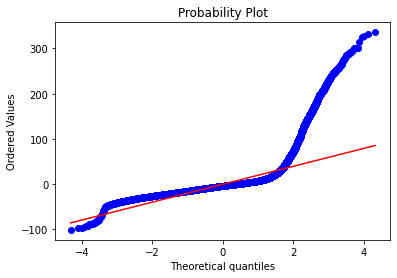

In [50]:
from scipy import stats
# should be less deviated

stats.probplot(ols_mod.resid, plot=plt);

**Inference:**
    Actually there should be less deaviation however we can see it highly deviated so probably not-linear

### 4. Autocorelation:

statistically we can use durbin watsom test to check auto-corealtion

    0-2: positive autocorrelation
      2: no autocorealtion
    2-4: negative autocorrelation

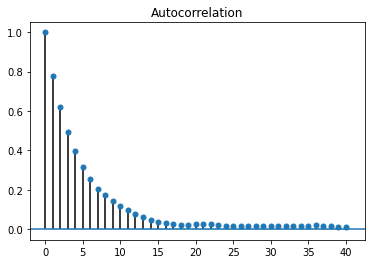

In [52]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(ols_mod.resid, lags=40, alpha=0.6)

**Inference:**
    out durbin watson value is 0.4 indicating positive autocorelation, generally if residues are normally distributed we do not have auto-corelation problem , what we can do is probably scle the features or apply transformation on inputs one by one.

### 5. Homoscedasticity

checking whether residuals are symmetrically distributed across trend or follow a pattern (should be random)

In [54]:
#statistical test
 # H0: model is homoscadic
 # H1: model is heteroscadic

from statsmodels.stats.api import het_goldfeldquandt
t,pval, _ = het_goldfeldquandt(ols_mod.resid, ols_mod.model.exog)

if pval >0.05:
    print(f"goldfeldquandt test pvalue : {pval}")
    print("Null accepted: homoscedastic")
else:
    print(f"goldfeldquandt test pvalue : {pval}")
    print("Null rejected: heteroscadic")

goldfeldquandt test pvalue : 0.9999999999999999
Null accepted: homoscedastic


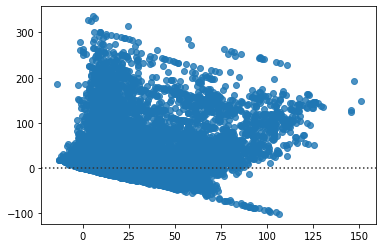

In [55]:
# checking visually
sns.residplot(ypred, ols_mod.resid)

**Inference:**
    As we can see half of the assumptions as not satisfied so it is not best to use the linear model over here.

### As we can see most of the assumtions i.e out of 5 assumtptions 3 were not met which made it clear that using a linear model might not be the best choice.

In [56]:
significant_features = ols_mod.pvalues[ols_mod.pvalues < 0.05].index
insignificant_features = ols_mod.pvalues[ols_mod.pvalues > 0.05].index.tolist()

In [57]:
insignificant_features

['opened_by', 'location']

In [58]:
inp2=X_final.drop(insignificant_features[1:],axis=1)


In [59]:
# checking model after using columns with signifact features
X_constant=sm.add_constant(inp2)

ols = sm.OLS(y, X_constant)
ols_mod3 = ols.fit()
ols_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.222
Model:                               OLS   Adj. R-squared:                  0.222
Method:                    Least Squares   F-statistic:                     1178.
Date:                   Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                           21:27:38   Log-Likelihood:            -4.2478e+05
No. Observations:                  90956   AIC:                         8.496e+05
Df Residuals:                      90933   BIC:                         8.498e+05
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      19.1612      0.086    223.761      0.000      18.993      19.329
reassignment_count         -8.6204      0.123    -70.075      0.000      -8.861      -8.379
reopen_count               -1.8472      0.113    -16.330      0.000      -2.069      -1.626
sys_mod_count              18.5539      0.128    144.582      0.000      18.302      18.805
opened_month              -11.6538      1.984     -5.875      0.000     -15.542      -7.766
opened_day                 -4.1528      0.746     -5.568      0.000      -5.615      -2.691
opened_hour                 0.1872      0.382      0.490      0.624      -0.561       0.935
opened_minute              -0.5437      0.107     -5.099      0.000      -0.753      -0.335
sys_created_month          11.5114      1.991      5.782      0.000       7.609      15.414
sys_created_day             3.6994      0.743      4.977      0.000       2.243       5.156
sys_created_hour            0.3355      0.382      0.879      0.379      -0.412       1.084
sys_created_minute          0.5217      0.107      4.873      0.000       0.312       0.732
incident_state              3.0170      0.090     33.473      0.000       2.840       3.194
opened_by                   0.0398      0.090      0.445      0.656      -0.136       0.215
sys_created_by             -0.3890      0.090     -4.333      0.000      -0.565      -0.213
category                   -0.3730      0.087     -4.308      0.000      -0.543      -0.203
subcategory                -0.6075      0.087     -6.992      0.000      -0.778      -0.437
u_symptom                   0.1949      0.086      2.261      0.024       0.026       0.364
priority                    1.7806      0.089     20.097      0.000       1.607       1.954
assignment_group            0.8141      0.089      9.160      0.000       0.640       0.988
assigned_to                 1.7925      0.089     20.239      0.000       1.619       1.966
knowledge                   2.1034      0.112     18.740      0.000       1.883       2.323
u_priority_confirmation     0.3089      0.114      2.698      0.007       0.085       0.533
==============================================================================
Omnibus:                    88031.842   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4375972.277
Skew:                           4.784   Prob(JB):                         0.00
Kurtosis:                      35.606   Cond. No.                         56.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
from sklearn.ensemble import RandomForestRegressor

rfe = RandomForestRegressor(random_state=4)
rfe.fit(inp2, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=4, verbose=0, warm_start=False)

In [63]:
# plt.figure(figsize=(15,10))
# plt.barh(inp2.columns,rfe.feature_importances_)

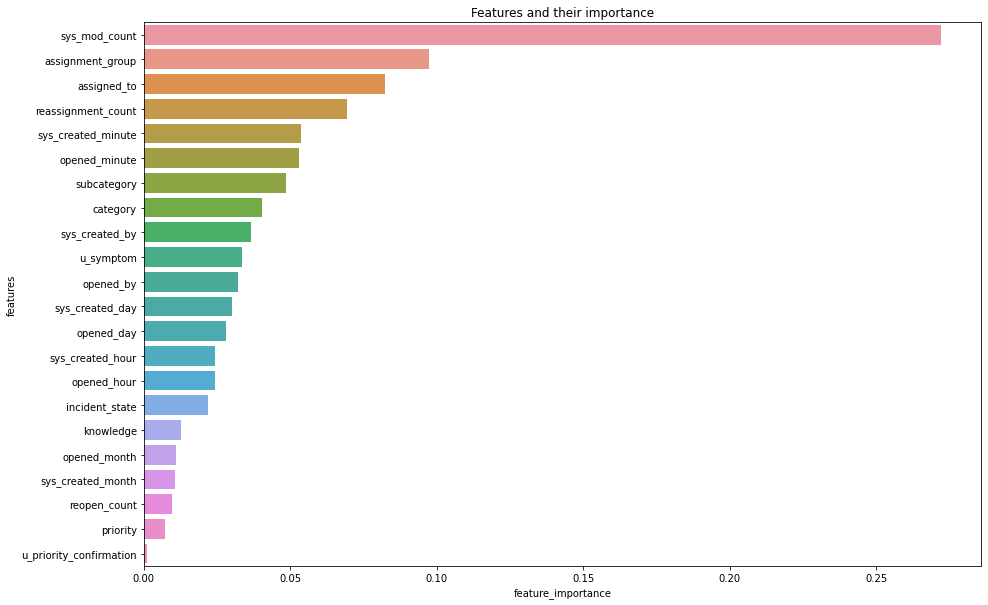

In [62]:
feat_imp = pd.DataFrame({'features':inp2.columns.tolist(),
             'feature_importance':rfe.feature_importances_}).sort_values(by='feature_importance', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot( 'feature_importance', 'features', data=feat_imp)
plt.title("Features and their importance")

plt.show()